In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [4]:
train_data = pd.read_excel(r"C:\Users\ANUSHKA\Downloads\Data_Train_lyst6947.xlsx")

In [6]:
pd.set_option('display.max_column',None)

In [101]:
train_data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,2019-03-24,22,20,2,50
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,2019-05-01,5,50,7,25
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882,9,2019-06-09,9,25,19,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,2019-05-12,18,5,5,25
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,2019-03-01,16,50,4,45


In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Airline         10682 non-null  object        
 1   Source          10682 non-null  object        
 2   Destination     10682 non-null  object        
 3   Arrival_Time    10682 non-null  object        
 4   Total_Stops     10682 non-null  object        
 5   Price           10682 non-null  int64         
 6   Journey_day     10682 non-null  int64         
 7   Journey_month   10682 non-null  datetime64[ns]
 8   Deep_hour       10682 non-null  int64         
 9   Deep_min        10682 non-null  int64         
 10  Duration_hours  10682 non-null  int64         
 11  Duration_mins   10682 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1.1+ MB


In [9]:
train_data ["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train_data.dropna(inplace = True)

In [13]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
train_data ["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%y").dt.day

ValueError: unconverted data remains: 19

In [19]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [20]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y")

In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,2019-03-24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019-05-01
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019-06-09
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019-05-12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019-03-01


In [23]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [25]:
train_data["Deep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

In [26]:
train_data["Deep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

In [29]:
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [30]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,2019-03-24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,2019-05-01,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,2019-06-09,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,2019-05-12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,2019-03-01,16,50


In [34]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))               
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [35]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [36]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,2019-03-24,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,2019-05-01,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,2019-06-09,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,2019-05-12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,2019-03-01,16,50,4,45


In [39]:
train_data.drop(["Duration"],axis = 1,inplace = True)

In [40]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,2019-03-24,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,2019-05-01,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,2019-06-09,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,2019-05-12,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,2019-03-01,16,50,4,45


In [41]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

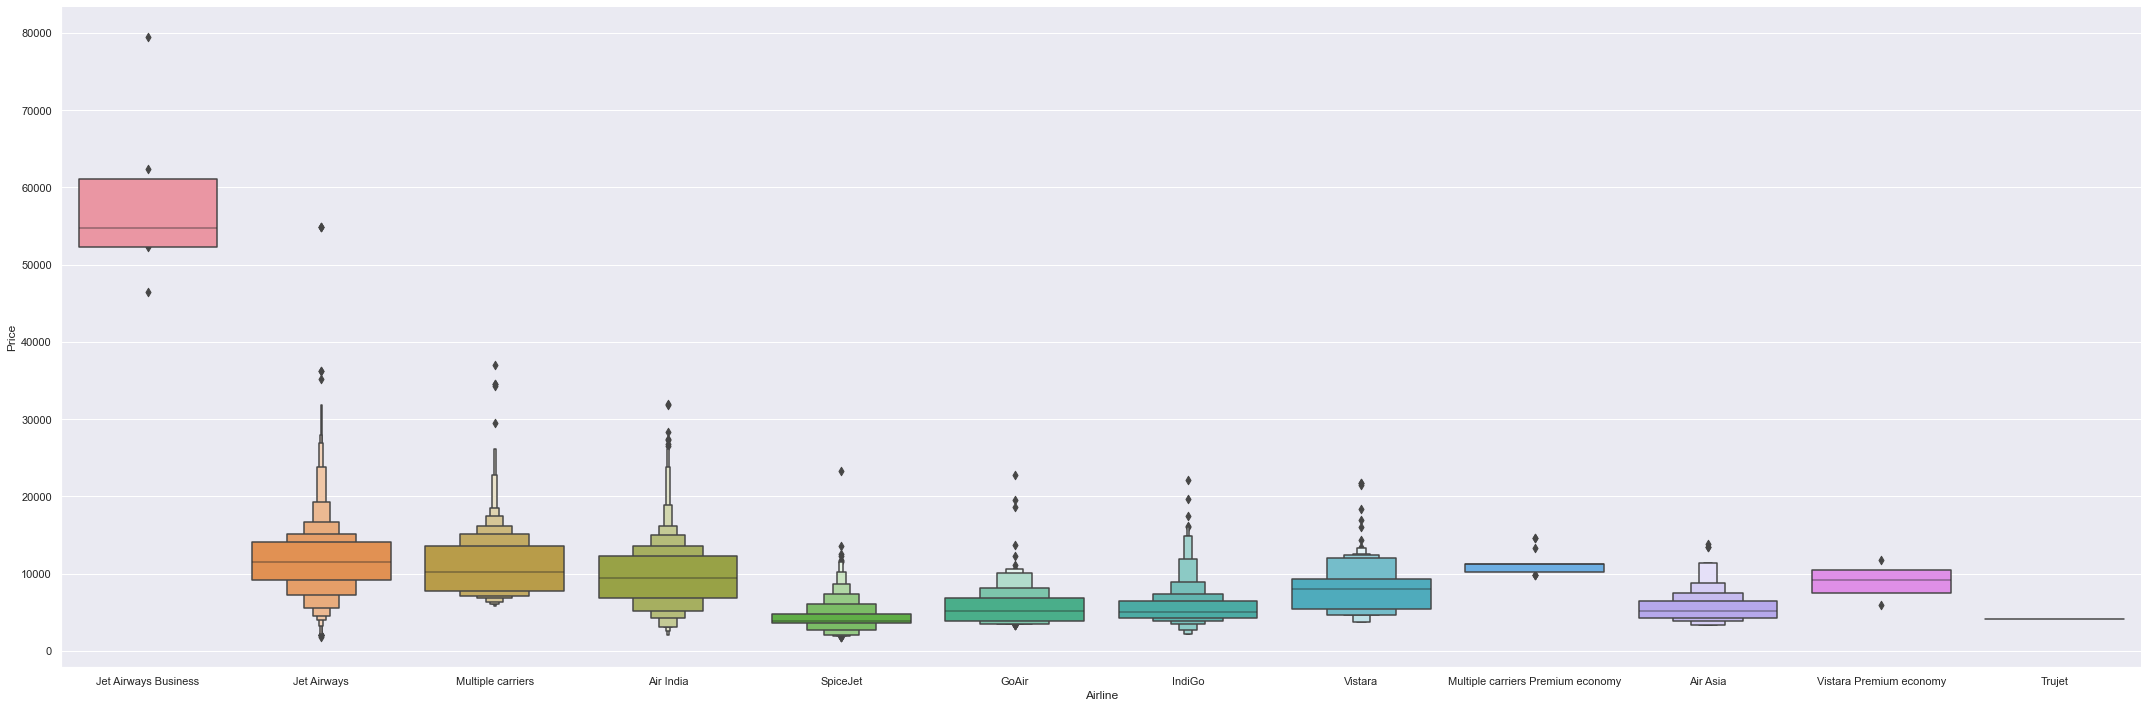

In [53]:
sns.catplot(y = 'Price', x = 'Airline',data = train_data.sort_values("Price", ascending = False), kind = "boxen", height = 10, aspect = 3)
plt.show()

In [61]:
Airline = train_data[["Airline"]]

In [56]:
Airline = pd.get_dummies(Airline, drop_first = True)

In [59]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [62]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

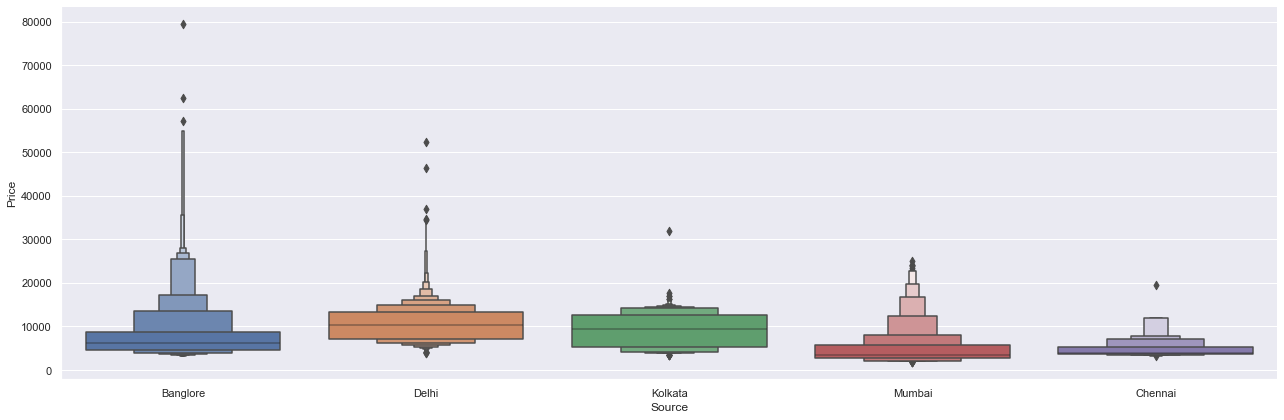

In [63]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price",ascending = False), kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [64]:
Source = train_data[["Source"]]

In [65]:
Source = pd.get_dummies(Source,drop_first = True)

In [66]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [71]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [72]:
Destination= train_data[["Destination"]]

In [77]:
Destination = pd.get_dummies(Destination , drop_first = True)

In [78]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [80]:
train_data["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [81]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [82]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [83]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [85]:
 train_data.replace({"non-stop" : 0, "1 stop" : 1, "2 stop" : 2,"3 stop" : 3,"4 stop" : 4}, inplace = True)

In [87]:
train_data.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,2019-03-24,22,20,2,50
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,2019-05-01,5,50,7,25
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882,9,2019-06-09,9,25,19,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,2019-05-12,18,5,5,25
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,2019-03-01,16,50,4,45


In [91]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [92]:
data_train.head()

,Airline,Source,Destination,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins,Airline,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,0,3897,24,2019-03-24,22,20,2,50,IndiGo,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,13:15,2 stops,7662,1,2019-05-01,5,50,7,25,Air India,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,2 stops,13882,9,2019-06-09,9,25,19,0,Jet Airways,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,23:30,1,6218,12,2019-05-12,18,5,5,25,IndiGo,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,21:35,1,13302,1,2019-03-01,16,50,4,45,IndiGo,0,0,0,0,0,0,0,0,1


In [93]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [94]:
data_train.head()

,Arrival_Time,Total_Stops,Price,Journey_day,Journey_month,Deep_hour,Deep_min,Duration_hours,Duration_mins,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,01:10 22 Mar,0,3897,24,2019-03-24,22,20,2,50,0,0,0,0,0,0,0,0,1
1,13:15,2 stops,7662,1,2019-05-01,5,50,7,25,0,0,1,0,0,0,0,0,0
2,04:25 10 Jun,2 stops,13882,9,2019-06-09,9,25,19,0,0,1,0,0,1,0,0,0,0
3,23:30,1,6218,12,2019-05-12,18,5,5,25,0,0,1,0,0,0,0,0,0
4,21:35,1,13302,1,2019-03-01,16,50,4,45,0,0,0,0,0,0,0,0,1


In [96]:
data_train.shape

(10682, 18)

In [ ]:



TEST. DATASET



In [99]:
test_data = pd.read_excel(r"C:\Users\ANUSHKA\Downloads\Test_set_lyst5257.xlsx")

In [100]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [106]:
data_train.shape

(10682, 18)